# **Simple Black-box Adversarial Attack (SimBA) and Binary Input Detector Using MNIST-10**



### **Simple Black-box Adversarial Attack (SimBA) - Overview**

The **Simple Black-box Adversarial Attack (SimBA)** is a method developed by **Song et al**. in 2020, designed for creating adversarial examples in a black-box setting. **Black-box** attacks refer to situations where the attacker does not have access to the model’s internal parameters (such as its architecture or weights) and can only query the model’s output for a given input.

SimBA is one of the **simple yet effective** methods for black-box adversarial attacks. It aims to find adversarial examples by using **gradient estimation** methods to perturb the input in a way that maximizes the model's misclassification, without needing to know the model's gradients.

The main idea behind SimBA is to perform **gradient-free optimization** using a **query-based approach**, which makes it suitable for scenarios where access to model internals (like gradients) is restricted.

#### **Key Concepts:**

**1. Black-box Attack:** The attacker can only observe the model's output for a given input, without knowledge of the internal architecture or parameters of the model.

**2. Query-based Attack:** The attack is based on making queries to the model and observing the output (such as class probabilities or logits).

**3. Gradient-free Optimization:** Unlike attacks like FGSM or PGD, SimBA does not require computing gradients directly. Instead, it estimates the gradient using **model queries** to determine which direction to perturb the input in.

**4. Perturbation Strategy:** SimBA uses a local search method that perturbs the input in small steps and evaluates which perturbation maximizes the misclassification.

#### **Steps in the SimBA Attack**

SimBA uses a simple but effective approach to perturb the input by querying the model's output at different perturbed points and selecting the direction that maximizes the likelihood of misclassification.

Here are the detailed steps involved in executing a SimBA attack:

**1. Initialization:**

* Start with an original input $x$ (such as an image) and its true label $y$.
* Define a small perturbation budget $ϵ$, which controls how much the input can be perturbed.
* Choose a specific perturbation step size (for example, $α$ which determines how much we perturb each input during each query).

**2. Perturbation Process:**

SimBA generates adversarial examples by perturbing the input in the following manner:

* For each query, SimBA perturbs the input in each dimension (pixel, for image inputs).

* At each iteration, SimBA perturbs the input by a small amount in one of two directions: positive or negative for each pixel.

* Mathematically, let the original input be $x$, and suppose the perturbation applied at iteration $t$ is represented as $δ_{t}$​. The perturbed inputs for each dimension (pixel) are created as:
$$x_{t}^{+}=x+α⋅sign(∇_{xi}) \quad and \quad x_{t}^{−}=x−α⋅sign(∇_{xi})$$

* where $α$ is the step size, $x_{t}^{+}$ is the perturbed input with positive perturbation in the $i^{th}$ dimension, and $x_{t}^{−}$​ is the perturbed input with negative perturbation in the $i^{th}$ dimension.

**3. Query and Evaluate:**

For each perturbed input:

* Query the model with $x_{t}^{+}​$ and $x_{t}^{−}$​ to get the corresponding outputs. These outputs could be probabilities or logits (depending on the model’s output type).
* For classification models, SimBA queries both perturbed versions and selects the direction (positive or negative perturbation) that increases the probability of misclassification. The goal is to perturb the input in a way that increases the distance between the true class $y$ and the predicted class.

**4. Selecting Perturbation Direction:**

* For each perturbed direction (positive or negative), evaluate the model’s output (such as the predicted class probability). Select the perturbation direction that leads to the most significant change in the model’s output, which typically corresponds to an increase in the misclassification confidence.

**5. Iterative Process:**

* Repeat the above process for multiple dimensions (pixels) of the input.
* Continue iterating the process to gradually build the adversarial perturbation that causes the model to misclassify the input. The attack typically continues until the adversarial example is successfully found or until a query budget (maximum allowed queries) is exhausted.

**6. Final Adversarial Example:**

* Once the attack is successful (i.e., the model misclassifies the perturbed input), the generated adversarial example $x_{adv}$​ is returned.

Formula Breakdown

SimBA does not explicitly use a loss function or gradient computation like gradient-based attacks (e.g., FGSM or PGD). Instead, it operates as follows:

**1. Perturbation**: For each query, perturb the input in both directions for each pixel:
$$x_{t}^{+}=x+α⋅sign(∇_{xi}) \quad and \quad x_{t}^{−}=x−α⋅sign(∇_{xi})$$
    

**2. Querying the Model**: Evaluate the model’s output for each perturbed input:

$$\hat{y}^{+}=Model(x_{t}^{+}) \quad and \quad \hat{y}^{−}=Model(x_{t}^{−})$$

Select Direction: Choose the perturbation direction based on which leads to greater misclassification:

$$ \delta_i = \begin{cases} +\alpha & \text{if } \hat{y}^{+} \text{ leads to a greater misclassification} \\ -\alpha & \text{if } \hat{y}^{-} \text{ leads to a greater misclassification} \end{cases} $$

Repeat for Multiple Steps: Iterate this process until the perturbation causes the model to misclassify or until the allowed query budget is exhausted.

#### **How SimBA Works During the Attack**

**1. Input**: Start with the original input $x$ and its true label $y$.

**2. Perturbation**: Perturb the input across multiple pixels, making small adjustments in both directions (positive and negative).

**3. Query**: Query the model with both perturbed inputs and evaluate which perturbation moves the output further away from the true class, increasing the misclassification.

**4. Iterate**: Repeat the perturbation process, fine-tuning the perturbation until a successful adversarial example is found or the query limit is reached.

**5. Final Adversarial Example**: The result is an adversarial example $x_{adv}$​ that causes the model to misclassify the input, generated entirely from the query responses without requiring access to the model’s internal structure or gradients.

#### **Strengths and Weaknesses of SimBA**

**Strengths:**

* **Black-box Applicability**: SimBA is designed specifically for black-box attacks, making it useful when the attacker has no access to the model's parameters or gradients.
* **Simplicity**: The method is relatively simple to implement and does not require sophisticated optimization techniques or complex loss functions.
* **Efficiency**: SimBA is computationally efficient, especially in situations where querying the model is relatively inexpensive, as it avoids complex optimization or gradient computation.

**Weaknesses:**

* **Query Budget Limitation**: Since SimBA is a query-based attack, the number of queries to the model is a critical factor. If the query budget is limited, the attack may not succeed, especially for high-dimensional inputs (like images).
* **Effectiveness**: While SimBA is effective in many cases, its performance may not be as strong as gradient-based methods in some scenarios, especially if the model is robust to certain types of perturbations.
* **Dimensionality Issues**: In cases where the input data is high-dimensional (e.g., images with many pixels), SimBA might need a large number of queries to perturb a sufficient number of pixels to cause misclassification.

## **Implementation**

This notebook demonstrates the implementation of the SimBA attack using the Adversarial Robustness Toolbox (ART) against deep learning models trained on the MNIST-10 dataset. The tasks covered in this notebook are:

* Load the Required Libraries
* Load the Dataset and Inspect the Data
* Create a Deep Learning Model
* Train and Evaluate the Deep Learning Model on MNIST Test Data
* Implement SimBA Attack Using ART
* Create Adversarial Samples Using the SimBA Attack
* Evaluate the Deep Learning Model Against the Adversarial Samples
* Create a Detector Model to Detect Adversarial Samples
* Train and Evaluate the Detector Model

## Install and load required libraries

In [ ]:
# Install the Adversarial Robustness Toolbox for creating and evaluating adversarial attacks.
!pip install adversarial-robustness-toolbox

# Install VisualKeras for visualizing model architecture with layer types and connections.
!pip install visualkeras

In [16]:
# Suppress warnings to keep the notebook output clean.
import warnings
warnings.filterwarnings('ignore')

# Import TensorFlow and disable eager execution for compatibility with some ART components.
import tensorflow as tf
# tf.compat.v1.disable_eager_execution()

# Import numerical and visualization libraries.
import numpy as np
from matplotlib import pyplot as plt

# Import ART (Adversarial Robustness Toolbox) modules:
# - KerasClassifier wraps Keras models for ART compatibility.
# - SimBA is an evasion attack method.
# - BinaryInputDetector is used to detect adversarial inputs.
from art.estimators.classification import KerasClassifier
from art.attacks.evasion import SimBA
from art.defences.detector.evasion import BinaryInputDetector

In [2]:
# Set only GPU:1 to be visible (index starts at 0)
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # Restrict TensorFlow to only use the second GPU
        tf.config.set_visible_devices(gpus[2], 'GPU')

        # Optionally, set memory growth to avoid pre-allocating the entire GPU
        tf.config.experimental.set_memory_growth(gpus[2], True)

        logical_gpus = tf.config.list_logical_devices('GPU')
        print(f"{len(gpus)} Physical GPUs, {len(logical_gpus)} Logical GPU(s) being used.")
    except RuntimeError as e:
        print(e)

3 Physical GPUs, 1 Logical GPU(s) being used.


I0000 00:00:1756157228.452321  182057 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 45760 MB memory:  -> device: 2, name: Quadro RTX 8000, pci bus id: 0000:73:00.0, compute capability: 7.5


### Load MNIST dataset

In [3]:
# Load MNIST dataset from TensorFlow's built-in datasets.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to the range [0, 1].
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Get minimum and maximum pixel values (should be 0.0 and 1.0 after normalization).
min_val = x_train.min()
max_val = x_train.max()

# Output dataset shapes and value range for verification.
x_train.shape, y_train.shape, x_test.shape, y_test.shape, min_val, max_val

((60000, 28, 28),
 (60000,),
 (10000, 28, 28),
 (10000,),
 np.float32(0.0),
 np.float32(1.0))

#### Inspect the Data


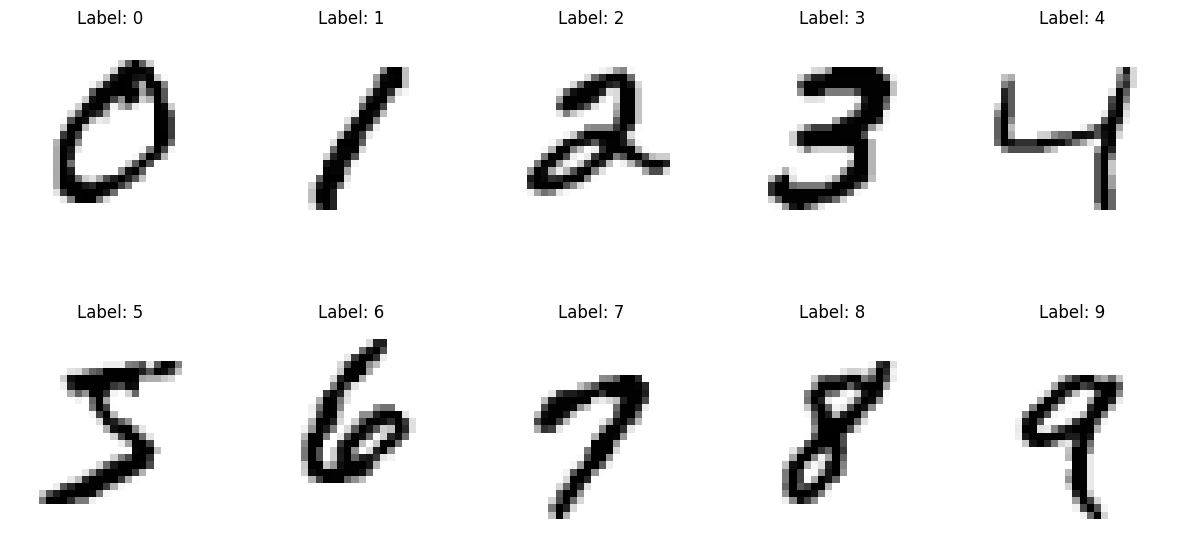

In [4]:
# Plot 10 sample images from the training set with their corresponding labels.
fig, ax = plt.subplots(2, 5, figsize=(15, 7))
ax = ax.flatten()

# Display one example image for each digit label from 0 to 9.
for i in range(10):
    # Get the first image corresponding to label i
    img_idx = np.argwhere(y_train == i)[0][0]
    ax[i].imshow(x_train[img_idx], cmap='gray_r')
    ax[i].set_title(f"Label: {i}", fontsize=12)
    ax[i].axis('off')

### Reshape and one-hot encode the data

In [5]:
# Number of output classes (digits 0 through 9).
nb_classes = 10

# One-hot encode the labels for training and testing sets.
y_train = tf.keras.utils.to_categorical(y_train, num_classes=nb_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=nb_classes)

# Expand image dimensions to add a channel axis (from [28, 28] to [28, 28, 1]).
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

## **Model Training**

#### **Model Description**

This convolutional neural network (CNN) is designed for image classification tasks. It consists of several layers that progressively extract features from the input images and classify them into one of 10 categories.

1. Input Layer: The model accepts input images of shape (28, 28, 1).
2. Convolutional Layers:
    * First Conv Layer: 32 filters of size (3x3), activated by ReLU, followed by max pooling (2x2).
    * Second Conv Layer: 64 filters of size (3x3), activated by ReLU, followed by max pooling (2x2).
    * Third Conv Layer: 128 filters of size (3x3), activated by ReLU, followed by max pooling (2x2).
3. Flatten Layer: Converts the 2D feature maps to a 1D feature vector.
4. Dense Layer: Fully connected layer with 128 neurons, activated by ReLU, and includes a dropout of 20% to prevent overfitting.
5. Output Layer: 10 neurons with softmax activation to classify the input image into one of the 10 categories.

The model is compiled with the Adam optimizer and uses categorical cross-entropy loss, with accuracy as the performance metric.

In [7]:
# Define a sequential Convolutional Neural Network (CNN) model.
model = tf.keras.models.Sequential([
    # First convolutional block: Conv → ReLU → MaxPooling
    # tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Second convolutional block
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', strides=1),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    # Third convolutional block
    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', strides=1),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    # Flatten the output to feed into dense layers
    tf.keras.layers.Flatten(),

    # Fully connected dense layer
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),  # Dropout for regularization

    # Output layer with softmax activation for multi-class classification
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model with Adam optimizer and categorical crossentropy loss
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### Model Summary

In [8]:
# Print a detailed summary of the model architecture,
# including layer types, output shapes, and number of parameters.
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,578 (396.79 KB)

 Trainable params: 101,578 (396.79 KB)

 Non-trainable params: 0 (0.00 B)

### Visualize the CNN Architecture

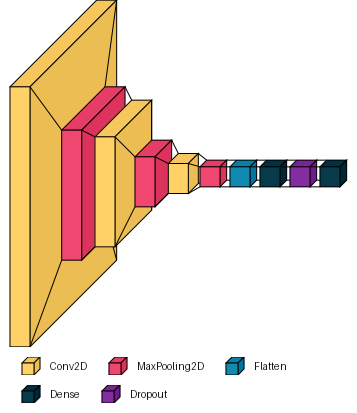

In [9]:
import visualkeras
# Display a layered visual representation of the model architecture.
# 'scale_xy' controls the scaling of the diagram.
# 'legend=True' shows layer types with corresponding color codes.
visualkeras.layered_view(model, scale_xy=10, legend=True)

### Visualize Model Architecture Diagram

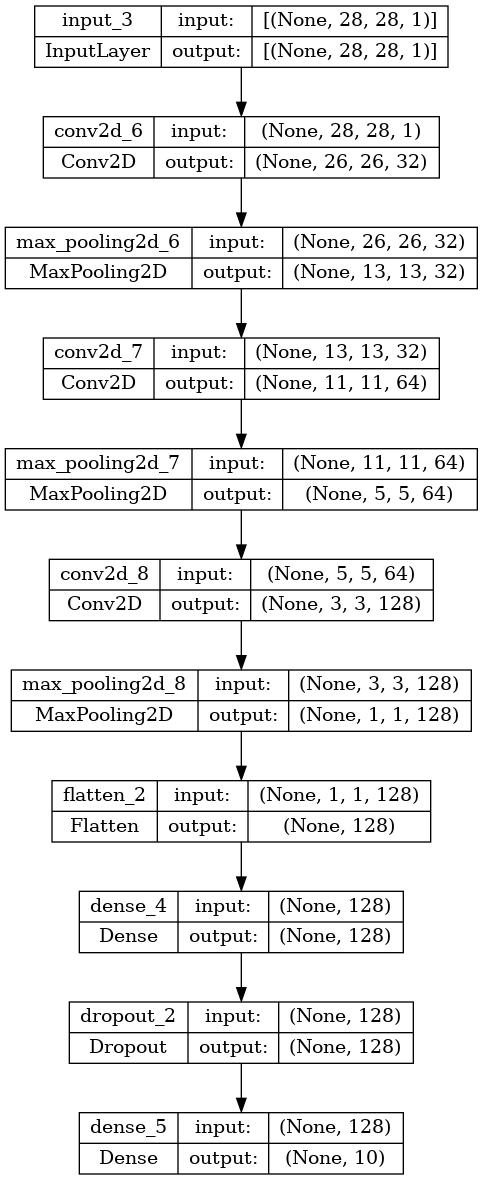

In [ ]:
# Generate and display a plot of the model architecture,
# showing each layer’s name and output shape.
tf.keras.utils.plot_model(model, show_shapes=True, dpi = 75)

### Fit the model on training data.

In [11]:
# Train the model on the training data for 3 epochs.
# The history object stores training metrics and loss values.
# history = model.fit(x_train, y_train, epochs=10, batch_size=128)

## Load or Save the Trained Model

In [12]:
# If you have trained your own model and want to save it, uncomment and run:
model_path = './mnist10_model.keras'
# model.save(model_path)

# Otherwise, load the pretrained model provided (e.g., from Google Drive or HuggingFace).
!wget https://raw.githubusercontent.com/mnazari123/SecAI_Workshop_Data/main/Models/mnist10_model.keras
model = tf.keras.models.load_model(model_path)

# Display the model architecture summary to make sure the model has successfully been loaded.
model.summary()

--2025-08-25 16:28:07--  https://raw.githubusercontent.com/mnazari123/SecAI_Workshop_Data/main/Models/mnist10_model.keras
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1266398 (1.2M) [application/octet-stream]
Saving to: ‘mnist10_model.keras.6’

mnist10_model.keras 100%[===================>]   1.21M  --.-KB/s    in 0.1s    

2025-08-25 16:28:07 (11.2 MB/s) - ‘mnist10_model.keras.6’ saved [1266398/1266398]



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 304,736 (1.16 MB)

 Trainable params: 101,578 (396.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,158 (793.59 KB)

### Evaluate Model Performance on Test Data

In [13]:
# Evaluate the model on the test dataset and get loss and accuracy.
loss_test, accuracy_test = model.evaluate(x_test, y_test)

# Print the test accuracy as a percentage.
print('Accuracy on test data: {:4.2f}%'.format(accuracy_test * 100))

2025-08-25 16:28:11.352234: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,32,26,26]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,1,28,28]{3,2,1,0}, f32[32,1,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-08-25 16:28:11.370848: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,64,11,11]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,32,13,13]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config=

308/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9868 - loss: 0.0711

2025-08-25 16:28:12.209220: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[16,32,26,26]{3,2,1,0}, u8[0]{0}) custom-call(f32[16,1,28,28]{3,2,1,0}, f32[32,1,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-08-25 16:28:12.219799: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[16,64,11,11]{3,2,1,0}, u8[0]{0}) custom-call(f32[16,32,13,13]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config=

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9896 - loss: 0.0567
Accuracy on test data: 98.96%


### Wrap the Keras Model with an ART Classifier

In [17]:
# Create an ART KerasClassifier to enable adversarial robustness tools.
# 'clip_values' defines the input data range for normalization and attack generation.
classifier = KerasClassifier(model=model, clip_values=(min_val, max_val))

# **SimBA Attack**

## Overview

> class art.attacks.evasion.SimBA(classifier: CLASSIFIER_TYPE, attack: str = 'dct', max_iter: int = 3000, order: str = 'random', epsilon: float = 0.1, freq_dim: int = 4, stride: int = 1, targeted: bool = False, batch_size: int = 1, verbose: bool = True)

---

This class implements the black-box attack SimBA.
* Paper link: https://arxiv.org/abs/1905.07121

*__init__(classifier: CLASSIFIER_TYPE, attack: str = 'dct', max_iter: int = 3000, order: str = 'random', epsilon: float = 0.1, freq_dim: int = 4, stride: int = 1, targeted: bool = False, batch_size: int = 1, verbose: bool = True)*

**Create a SimBA (dct) attack instance.**

    Parameters
* classifier – A trained classifier predicting probabilities and not logits.
* attack (str) – attack type: pixel (px) or DCT (dct) attacks
* max_iter (int) – The maximum number of iterations.
* epsilon (float) – Overshoot parameter.
* order (str) – order of pixel attacks: random or diagonal (diag)
* freq_dim (int) – dimensionality of 2D frequency space (DCT).
* stride (int) – stride for block order (DCT).
* targeted (bool) – perform targeted attack
* batch_size (int) – Batch size (but, batch process unavailable in this implementation)
* verbose (bool) – Show progress bars.


    diagonal_order(image_size, channels)
Defines a diagonal order for pixel attacks. order is fixed across diagonals but are randomized across channels and within the diagonal e.g. [1, 2, 5] [3, 4, 8] [6, 7, 9]

    Parameters
* image_size – image size (i.e., width or height)
* channels – the number of channels

    
    Return order
* An array holding the diagonal order of pixel attacks.

    
    generate(x: ndarray, y: Optional[ndarray] = None, **kwargs) → ndarray
Generate adversarial samples and return them in an array.

    Return type
* ndarray
    
    
    Parameters
* x (ndarray) – An array with the original inputs to be attacked.
* y – An array with the true or target labels.

    
    Returns
* An array holding the adversarial examples.

Link: https://adversarial-robustness-toolbox.readthedocs.io/en/latest/modules/attacks/evasion.html#simple-black-box-adversarial-attack

### Create an ART SimBA attack.

In [18]:
# eps – defines the attack step size (input variation). The smaller the eps, the little the attack scale would be.
attack_simba = SimBA(classifier = classifier,
              attack = 'dct',
              max_iter = 1000,
              order = 'random',
               epsilon = 0.1,
               freq_dim = 4,
               stride = 1,
               targeted = False,
               batch_size = 1,
                verbose = False)

## Generate Adversarial Examples Using SimBA Attack

In [19]:
# Reduce test set size to 500 samples for faster adversarial generation and evaluation.
x_test = x_test[:500]
y_test = y_test[:500]

# Generate adversarial examples from the reduced test set using the PGD attack.
x_test_adv = attack_simba.generate(x_test)

## Save or Load SimBA-Generated Adversarial Test Data

In [20]:
# Option 1: Save your newly generated adversarial test data (uncomment to use).
simba_data_path = 'simba_poison_data_MNIST10_test_S500.npz'
np.savez(simba_data_path,
         x_test_adv=x_test_adv, y_test_adv=y_test)

# Option 2: Load previously saved adversarial test data (recommended for reuse or quick experiments).
# Download the data file from GitHub raw URL
# !wget https://raw.githubusercontent.com/mnazari123/SecAI_Workshop_Data/main/data/pgd_poison_data_MNIST10_test_S500.npz

# x_test_data = np.load(pgd_data_path)
# x_test_adv, y_test = x_test_data['x_test_adv'], x_test_data['y_test_adv']
# x_test_adv.shape, y_test.shape

## Visualize Adversarial Examples and Their Predictions

2025-08-26 09:29:16.483659: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[1,32,26,26]{3,2,1,0}, u8[0]{0}) custom-call(f32[1,1,28,28]{3,2,1,0}, f32[32,1,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-08-26 09:29:16.499909: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[1,64,11,11]{3,2,1,0}, u8[0]{0}) custom-call(f32[1,32,13,13]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cu

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


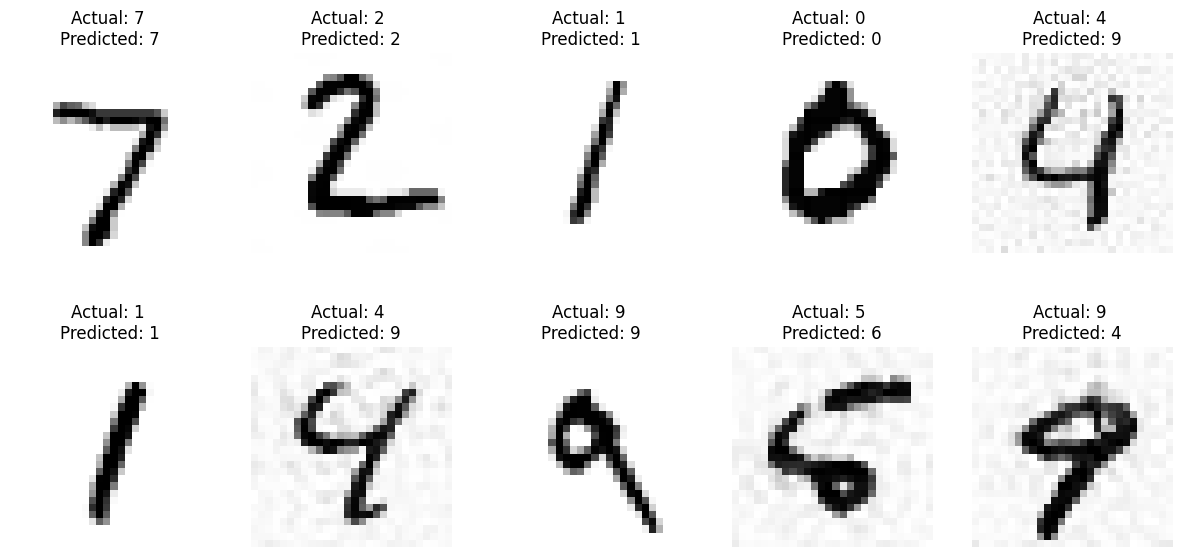

In [21]:
# Display the first 10 adversarial examples along with their actual and predicted labels.
fig, ax = plt.subplots(2, 5, figsize=(15, 7))
ax = ax.flatten()

for i, (image, label) in enumerate(zip(x_test_adv[:10], y_test[:10])):
    # Display the adversarial image.
    ax[i].imshow(image.squeeze(), cmap='gray_r')

    # Show actual and predicted labels.
    prediction = model.predict(np.expand_dims(image, axis=0)).argmax()
    ax[i].set_title(f"Actual: {label.argmax()} \nPredicted: {prediction}", fontsize=12)
    ax[i].axis('off')

## Evaluate the Model on Adversarial Test Data

In [22]:
# Evaluate model performance on adversarial examples.
loss_test, accuracy_test = model.evaluate(x_test_adv, y_test)

# Calculate the average perturbation introduced by the adversarial attack.
perturbation = np.mean(np.abs(x_test_adv - x_test))

# Print evaluation results.
print('Accuracy on adversarial test data: {:4.2f}%'.format(accuracy_test * 100))
print('Average perturbation: {:4.2f}'.format(perturbation))

 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6875 - loss: 0.2224

2025-08-26 09:29:26.566624: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[20,64,11,11]{3,2,1,0}, u8[0]{0}) custom-call(f32[20,32,13,13]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-08-26 09:29:26.599222: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[20,128,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[20,64,5,5]{3,2,1,0}, f32[128,64,3,3]{3,2,1,0}, f32[128]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6800 - loss: 0.2518
Accuracy on adversarial test data: 68.00%
Average perturbation: 0.01


# Prepare Training Data for Adversarial Sample Detector

In [23]:
# Generate new adversarial examples from a subset of the training data using PGD.
x_train_adv = attack_simba.generate(x_train[:500])
nb_train = x_train[:500].shape[0]

# Combine clean and adversarial samples to create a binary classification dataset for detection.
x_train_detector = np.concatenate((x_train[:500], x_train_adv), axis=0)

# Create labels: [1, 0] for clean samples, [0, 1] for adversarial samples.
y_train_detector = np.concatenate((
    np.array([[1, 0]] * nb_train),  # Clean
    np.array([[0, 1]] * nb_train)   # Adversarial
), axis=0)

##Save or Load Adversarial Detector Training Data

In [24]:
# Option 1: Save generated clean and adversarial samples for training the detector.
np.savez('./simba_poison_data_MNIST10_train_S1000.npz',
         x_train_detector=x_train_detector, y_train_detector=y_train_detector)

# Option 2: Load pre-saved detector training data to avoid regeneration.
# detector_data = np.load('./pgd_generated_data/pgd_detector_generated_MNIST10.npz')
# x_train_detector, y_train_detector = detector_data['x_train_detector'], detector_data['y_train_detector']

# Verify the shape of loaded or prepared data.
# x_train_detector.shape, y_train_detector.shape

## Build a similar CNN architecture model for detecting Adversarial Inputs

In [25]:
# Define a CNN model to detect adversarial vs. clean images (binary classification).
detector_model = tf.keras.models.Sequential([
    # First convolutional block
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Second convolutional block
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', strides=1),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    # Third convolutional block
    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', strides=1),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    # Classification head
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='softmax')  # Two output classes: [clean, adversarial]
])

# Compile the detector model with Adam optimizer and categorical crossentropy loss.
detector_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## Train the Adversarial Detector Model

In [26]:
# Train the adversarial detector model for 3 epochs.
# Since the goal is to distinguish between clean and adversarial inputs,
# a few epochs (e.g., 3) are typically sufficient to learn this binary classification task.
history = detector_model.fit(x_train_detector, y_train_detector, epochs=10)

Epoch 1/10


2025-08-26 10:18:08.438528: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,32,26,26]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,1,28,28]{3,2,1,0}, f32[32,1,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-08-26 10:18:08.457534: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,64,11,11]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,32,13,13]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config=

25/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5162 - loss: 0.7016 

2025-08-26 10:18:09.845324: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[8,32,26,26]{3,2,1,0}, u8[0]{0}) custom-call(f32[8,1,28,28]{3,2,1,0}, f32[32,1,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-08-26 10:18:09.855111: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[8,64,11,11]{3,2,1,0}, u8[0]{0}) custom-call(f32[8,32,13,13]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cu

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.5080 - loss: 0.6986
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5090 - loss: 0.6964
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4800 - loss: 0.6937
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4900 - loss: 0.6932
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4930 - loss: 0.6934
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5010 - loss: 0.6932
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5310 - loss: 0.6923
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5790 - loss: 0.6885
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5650 - loss: 0.6939
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5080 - loss: 0.6880


In [27]:
# Define path to save/load the detector model
detector_model_path = './SimBA_detector_model_mnist10.keras'
detector_model.save(detector_model_path)

# Load the pre-trained detector model from the specified path
# detector_model = tf.keras.models.load_model(path)

# Display the model architecture to make sure the models has been loaded successfully.
detector_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,328 (1.25 MB)

 Trainable params: 109,442 (427.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,886 (855.03 KB)

## Prepare test samples for the detector model

In [28]:
# Get the number of original test samples
nb_test = x_test.shape[0]

# Combine clean and adversarial test images into one array
x_test_detector = np.concatenate((x_test, x_test_adv), axis=0)

# Create corresponding labels: [1, 0] for clean, [0, 1] for adversarial
y_test_detector = np.concatenate((np.array([[1, 0]] * nb_test),
                                  np.array([[0, 1]] * nb_test)), axis=0)

### Evaluat the result

In [29]:
# --- Evaluate the detector model on combined test data ---

# Evaluate the model's performance on clean + adversarial samples
loss_test, accuracy_test = detector_model.evaluate(x_test_detector, y_test_detector)

# Print the accuracy as a percentage
print('Accuracy on test data: {:4.2f}%'.format(accuracy_test * 100))

29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8552 - loss: 0.6654   

2025-08-26 10:18:22.300796: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[8,32,26,26]{3,2,1,0}, u8[0]{0}) custom-call(f32[8,1,28,28]{3,2,1,0}, f32[32,1,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-08-26 10:18:22.311726: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[8,64,11,11]{3,2,1,0}, u8[0]{0}) custom-call(f32[8,32,13,13]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cu

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6650 - loss: 0.6704
Accuracy on test data: 66.50%


## Wrap detector model for adversarial detection

In [30]:
# Wrap the Keras detector model with ART's KerasClassifier
detector_classifier = KerasClassifier(clip_values=(0.0, 0.1), model=detector_model, use_logits=False)

# Create a BinaryInputDetector using the wrapped classifier
detector = BinaryInputDetector(detector_classifier)

## Train the BinaryInputDetector

In [31]:
## Train the BinaryInputDetector

# Train the detector on labeled clean and adversarial training data
detector.fit(x_train_detector, y_train_detector, nb_epochs=3, batch_size=32)

## Evaluating the detector on adversarial data


In [34]:
# Apply the detector to the adversarial test data
_, is_adversarial = detector.detect(x_test_adv)

# Count how many adversarial samples were flagged
flag_adv = np.sum(is_adversarial)

# Display detection results
print("Adversarial test data (first 500 images):")
print("Flagged: {}".format(flag_adv))
print("Not flagged: {}".format(500 - flag_adv))

Adversarial test data (first 500 images):
Flagged: 177
Not flagged: 323


## Evaluating the detector on clean (non-adversarial) data

In [35]:
_, is_adversarial = detector.detect(x_test)
flag_original = np.sum(is_adversarial)

print("Original test data (first 500 images):")
print("Flagged: {}".format(flag_original))
print("Not flagged: {}".format(500 - flag_original))

Original test data (first 500 images):
Flagged: 8
Not flagged: 492


## Evaluate the detector across different attack strengths (eps values)


In [37]:
# Note: Detector was trained with adversarial samples generated using eps = 0.2

eps_range = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
nb_flag_adv = []      # Number of adversarial examples flagged by the detector
nb_missclass = []     # Number of adversarial examples that fooled the classifier

for eps in eps_range:
    # Update simba attack with current epsilon
    attack_simba.set_params(**{'epsilon': eps})

    # Generate adversarial examples for current eps
    x_test_adv = attack_simba.generate(x_test[:100])

    # Count how many were flagged by the detector
    nb_flag_adv.append(np.sum(detector.detect(x_test_adv)[1]))

    # Count how many were misclassified by the classifier
    nb_missclass.append(
        np.sum(np.argmax(classifier.predict(x_test_adv), axis=1) != np.argmax(y_test[:100], axis=1))
    )

# Add clean data evaluation (eps=0) to the results
eps_range = [0] + eps_range
nb_flag_adv = [flag_original] + nb_flag_adv  # flag_original from clean data detection
nb_missclass = [2] + nb_missclass            # 2 misclassifications in clean test subset

## Plot detector performance vs. classifier errors for varying attack strengths

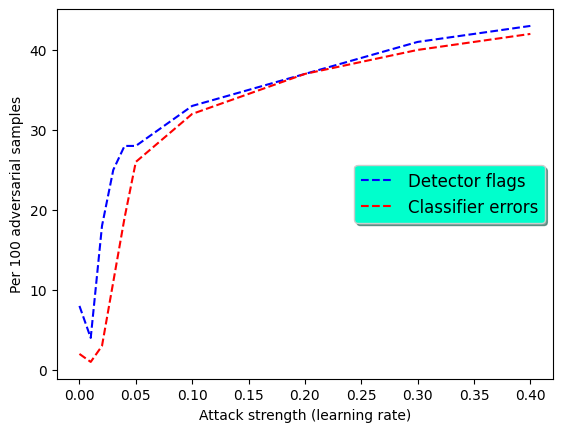

In [38]:
fig, ax = plt.subplots()

# Plot number of adversarial samples flagged by the detector
ax.plot(np.array(eps_range)[:10], np.array(nb_flag_adv)[:10], 'b--', label='Detector flags')

# Plot number of adversarial samples misclassified by the classifier
ax.plot(np.array(eps_range)[:10], np.array(nb_missclass)[:10], 'r--', label='Classifier errors')

# Customize legend
legend = ax.legend(loc='center right', shadow=True, fontsize='large')
legend.get_frame().set_facecolor('#00FFCC')

# Add axis labels
plt.xlabel('Attack strength (learning rate)')
plt.ylabel('Per 100 adversarial samples')

# Display the plot
plt.show()

## **Summary**


#### Simple Black-box Adversarial Attack (SimBA) and Binary Input Detector Using MNIST-10

This notebook demonstrates the implementation of the SimBA attack using the Adversarial Robustness Toolbox (ART) against deep learning models trained on the MNIST-10 dataset. The tasks covered include:

1. **Load the Required Libraries:** Import necessary Python libraries and modules, including TensorFlow/Keras and ART.
2. **Load the Dataset and Inspect the Data:** Load and visualize the MNIST-10 dataset of handwritten digits (0-9).
3. **Create a Deep Learning Model:** Construct a CNN to classify MNIST-10 digits, including convolutional, pooling, and fully connected layers.
4. **Train and Evaluate the Model:** Train the CNN on MNIST-10 and evaluate its baseline accuracy on test data.
5. **Implement SimBA Attack Using ART:** Use ART to perform the SimBA attack, which perturbs images by flipping pixel signs based on model queries. SimBA is notable for its simplicity and effectiveness in black-box settings.
6. **Create Adversarial Samples Using SimBA:** Generate adversarial examples from the test images using SimBA and visually inspect them.
7. **Evaluate Against Adversarial Samples:** Test the model's robustness by evaluating its accuracy on the adversarial samples.
8. **Create a Detector Model:** Develop a binary classifier to detect adversarial inputs by differentiating between original and adversarial images.
9. **Train and Evaluate the Detector:** Train the detector using a labeled dataset of original and adversarial samples, and evaluate its accuracy in identifying adversarial attacks.

This summary highlights the process and key tasks involved in implementing the SimBA attack and developing a binary input detector using the MNIST-10 dataset, illustrating the importance of adversarial defenses in machine learning.